# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [85]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [86]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [87]:
len(df.index)

294478

**c.** The number of unique users in the dataset.

In [88]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [89]:
df.converted.value_counts()/len(df.index)
#this comes to roughly 12% where 1 = converted

0    0.880341
1    0.119659
Name: converted, dtype: float64

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [90]:
#this question is really badly phrased because it obviously wants mismatches in both groups
num_treatment = df.query('(group == "treatment") and (landing_page !="new_page")').shape[0]
#num_treatment #returns 1965

num_control = df.query('(group == "control") and (landing_page !="old_page")').shape[0]
#num_control #returns 1928

print(num_treatment+num_control)

3893


**f.** Do any of the rows have missing values?

In [91]:
df.info()
#this shows no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [92]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]

In [93]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [94]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [95]:
df2[df2.user_id.duplicated()]
#it's user ID 773192

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [96]:
#I did that above, it's row 2893
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [97]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(df2.index[2893])
# Check again if the row with a duplicate user_id is deleted or not
sum(df2.duplicated())

0

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [98]:
#number of favorable outcomes divided by total number of incidents
cnv = df2.converted.value_counts() #34,753 instances of 1
total = df2.converted.shape[0] #290,584 total instances
prob = cnv/total
prob
#roughly 11.96 chance of being converted

0    0.880403
1    0.119597
Name: converted, dtype: float64

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [99]:
control_converted = df2.query('(group == "control") and (converted == 1)').shape[0]
control_total = df2.query('(group== "control")').shape[0]
p_old = control_converted/control_total
p_old
#roughly 12.04% chance of being converted

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [100]:
treatment_converted = df2.query('(group == "treatment") and (converted == 1)').shape[0]
treatment_total = df2.query('(group== "treatment")').shape[0]
p_new = treatment_converted/treatment_total
p_new
#11.88% chance of being converted

0.11880806551510564

In [101]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_new - p_old
obs_diff
#the negative value means that the new page has a slightly lower conversion rate, but again it's so slight

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [102]:
new_page_prob = df2.query('(landing_page == "new_page")').shape[0]/len(df2)
new_page_prob
#there's a 50% chance that the individual received the new page

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

<b>My answer</b>

There's really no meaningful difference in conversion rates (0.157%), so it's fair to say that the new page alone (all other factors holding) doesn't lead to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<b>My answer</b>

What we're testing is basically whether the old page has the same or better conversion rate as the new one, or whether the new one is better. Because we should be testing parameters not just comparing the statistics generally, we should evaluate this against a number. So we can look at the difference in conversion rates. If the difference is 0, then obviously the conversion rates are the same. If the difference (new - old) is greater than 0, it means that the new page has a higher conversion rate.

So the null hypothesis is that the obs_diff value (P<sub>new</sub> - P<sub>old</sub>) is less than or equal to 0, meaning that the conversion rates are either the same or favoring the old page. The alternative hypothesis is that the obs_diff value (P<sub>new</sub> - P<sub>old</sub>) is greater than 0, meaning the new page has a higher conversion rate.


H<sub>0</sub> = (P<sub>new</sub> - P<sub>old</sub>) <= 0

H<sub>a</sub> = (P<sub>new</sub> - P<sub>old</sub>) > 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [103]:
p_new_null = df2['converted'].mean()
p_new_null
#11.9% conversion rate

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [104]:
p_old_null = df2['converted'].mean()
p_old_null
#same conversion rate because the null hypothesis states that they're the same

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [105]:
n_new = df2.query('(group == "treatment")').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [106]:
n_old = df2.query('(group == "control")').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [107]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size = n_new, p = [1-p_new_null, p_new_null])
new_page_converted

array([0, 1, 0, ..., 0, 1, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [108]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old_null, p_old_null])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [109]:
p_new_null = new_page_converted.mean()
p_old_null = old_page_converted.mean()
obs_diff_sim = p_new_null - p_old
obs_diff_sim

0.00061706760056419452


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [110]:
# Sampling distribution
#p_diffs = []
#for i in range(10000):
#    new_page_converted2 = np.random.choice([1, 0], n_new,replace = True, p = [p_new_null, 1-p_new_null]).mean()
#    old_page_converted2 = np.random.choice([1, 0], n_old,replace = True, p = [p_old_null, 1-p_old_null]).mean()
#    samp_diffs = new_page_converted2 - old_page_converted2
#    p_diffs.append(samp_diffs)
#p_diffs
#this takes forever and I'm not sure it's the best way but the prompt said to use the same process

In [111]:
p_diffs = []

new_page_converted2 = np.random.binomial(n_new, p_new_null, 10000)/n_new
old_page_converted2 = np.random.binomial(n_old, p_old_null, 10000)/n_old
samp_diffs = new_page_converted2 - old_page_converted2
p_diffs.append(samp_diffs)
p_diffs

[array([ 0.00299845,  0.00329473,  0.00180777, ..., -0.00021531,
         0.00160832,  0.00014918])]

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

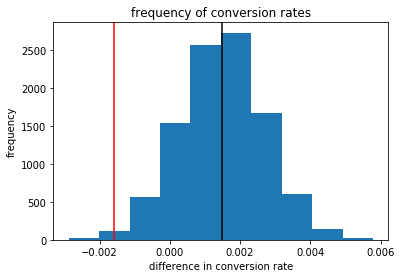

In [112]:
obsdiff_mean = np.mean(obs_diff)
pdiff_mean = np.mean(p_diffs)

plt.hist(p_diffs)
plt.xlabel('difference in conversion rate')
plt.ylabel('frequency')
plt.title('frequency of conversion rates')
plt.axvline(x=obsdiff_mean, color='red') #this is the mean of the original data
plt.axvline(x=pdiff_mean, color='black'); #this is the mean of the sample data

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [78]:
#convert list to an array in order to compute
p_diffs = np.array(p_diffs)
#p_diffs
(p_diffs > obs_diff).mean()
#this returns something quite different every time I rerun the notebook
#so at this moment it reads 0.9767

0.99819999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
<b>My Answer</b>
 - What we calculated is the p-value. Anecdotally in my statistics classes in school we always looked it up on a table, did it in python with one of the stats packages, or used a p-value calculator; I never knew you could just calculate it this way. 
 - If the p-value is smaller than the significance level (0.05 here), we reject the null hypothesis and accept the alternative. If the p-value is larger than the significance level, we do not reject the null hypothesis. So here since this p-value is almost 1, we definitely will not reject the null hypothesis and can conclude that there's no difference between the new and old page conversion rates.

Sorry I guess I wasn't supposed to write over the prompt.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('group == "control" & converted == 1').shape[0]

# number of conversions with the new_page
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]

# number of individuals who were shown the old_page
n_old = df2.query('group == "control"').shape[0]

# number of individuals who received new_page
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org


In [49]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


<b>My answer</b>

The Z-score tells us how far away the sample mean is from the population mean and indicates how many standard deviations it is from the population mean. So ours is 1.31 standard deviations away from the population mean.

The p-value of 0.09 is higher than the 0.05 significance level, so again we will not reject the null hypothesis and can conclude that there's no statistically significant difference between the two pages.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

Normally when trying to classify a variable with a binary outcome, you would use logistic regression.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [50]:
df2['intercept'] = 1
#create dummy variable
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
regmodel = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
fitted = regmodel.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
# summary doesn't seem to work anymore
fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-06-20 18:52 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


<b>My answer</b>

The p-value for ab_page is 0.1899. In Part II we had a p-value of 0.09. 

If we recall the hypotheses for the previous test, we were doing a 1-sided t-test, evaluating whether something was greater than or less than a given value (zero). For this model, because we're evaluating a binary variable not a continuous one, we're checking to see if it is or is not equal to zero. Therefore we would have a two-tailed t-test with the following hypotheses:

H<sub>0</sub>: p<sub>new</sub>−p<sub>old</sub> = 0

H<sub>a</sub>: p<sub>new</sub>−p<sub>old</sub> ≠ 0

The p-value for a 1-tailed t-test is going to be half the value of the p-value of a 2-tailed t-test, which we can see is the case.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<b>My Answer</b>
Given that the new vs old landing page alone seems to have no influence whatsoever on someone's conversion, they'll need to either come up with a new model or expand this model to consider other factors. There is nothing else in this dataset that could be used as far as I can see, so they should create a more extensive dataset. It could be that other factors like age, location, clickthrough rate, having arrived at the page via email campaign (I think this is something you can see as the admin of email campaigns), things like this, could be looked at in conjunction with the webpage version and show a difference in conversion. Honestly though it just sounds like an ineffective webpage redesign. If you created such a model, upon evaluating the significance of each variable I would not be surprised if page version ended up being insignificant. But before just throwing it out and spending the resources to redesign it I suppose it would make better business sense to just run a couple more models with other factors to see what happens.

In general there is no real disadvantage of adding <i>useful</i> additional terms to your regression model; it just becomes multiple logistic regression rather than simple logistic regression. It's advantageous in the right context and could lead to better insights and more accurate predictions. But if you introduce insignificant terms or terms that are themselves correlated it will obviously be unhelpful so you should test the individual terms and things like multicollinearity before committing to the model.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [34]:
countries = pd.read_csv('countries.csv')

In [35]:
# Join with the df2 dataframe
countries_joined = countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')

In [36]:
# Create the necessary dummy variables
countries_joined[['UK','US','CA']] = pd.get_dummies(countries_joined['country'])
countries_joined.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


In [39]:
# Fit your model, and summarize the results
countries_model = sm.Logit(countries_joined['converted'], countries_joined[['intercept','ab_page','US','CA']])
countries_fitted = countries_model.fit()
countries_fitted.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-06-20 19:20 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

Our hypotheses for the individual tests will again be null: that the term in question is not statistically significant (p-value > alpha) and alternative: that the term is statistically significant (p-value < alpha).

None of these have a p-value under the significance level of 0.05, so we will not reject the null hypothesis and conclude that location does not influence conversion. That's actually a little bit surprising since I'd assume that a business's country of origin would have more intensive ad campaigns domestically and therefore a higher conversion rate in that country, but here we are. 

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [44]:
#create interaction terms
countries_joined['US_ab_page'] = countries_joined['US'] * countries_joined['ab_page']
countries_joined['CA_ab_page'] = countries_joined['CA'] * countries_joined['ab_page']
countries_joined.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,1


In [45]:
countries2 = sm.Logit(countries_joined['converted'], countries_joined[['intercept','ab_page','US','CA','US_ab_page','CA_ab_page']])
fitted2 = countries2.fit()
fitted2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-06-20 19:34 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
CA_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

<b>My answer</b>
So again we'd do a beta test here on the interaction terms, where the null would be that each term is not statistically significant, and the alternative would be that it is statistically significant. Unfortuantely here, evaluated at a 0.05 significance level, we can see that both p-values are above that, so we will not reject the null hypothesis. We can conclude that location and the landing page version do not interact in a way that influences conversion rate.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0